Import all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from datetime import datetime
from time import *
from sklearn import metrics
# from pandas.stats.api import ols

Read data into dataframe with dateparser

In [0]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df = pd.read_csv('day.csv', parse_dates=['dteday'], date_parser=dateparse)


In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


Plotting cnt with respect to temperature

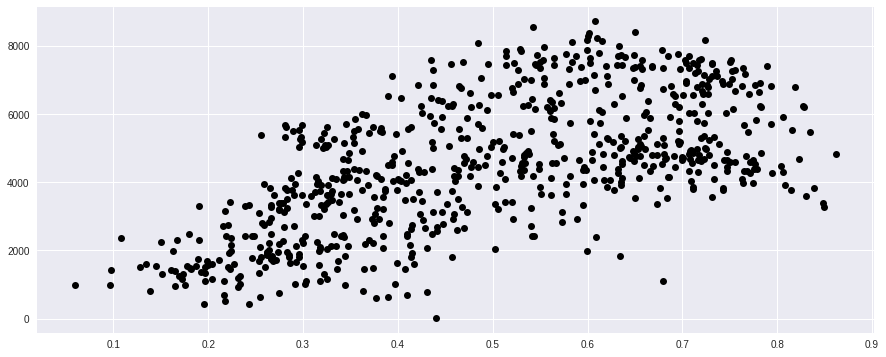

In [6]:
plt.plot(df['temp'], df['cnt'], 'o', color='black');



> cnt is increasing with temperature



Correlation between temp and cnt

In [7]:
df['temp'].corr(df['cnt'])

0.6274940090334918

Plotting cnt with respect to dteday

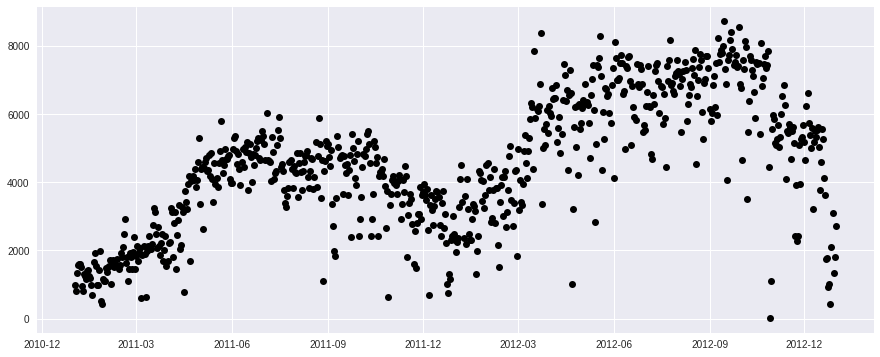

In [8]:
plt.plot(df['dteday'], df['cnt'], 'o', color='black')



> There is a clear seasonal trend where the total rental bikes seems to decrease during Winters i.e month of January and Feburary of the year and the total rental bikes seems to increase during summers. The other trend which is quite evident is that the number of rental bike counts is increasing from year 2011 to year 2012.




> 








> Change season from numerical to categirical




Changing season to categorical

In [0]:
df['season_cat'] = pd.Categorical(df['season'])

Boxplot of cnt with respect to season

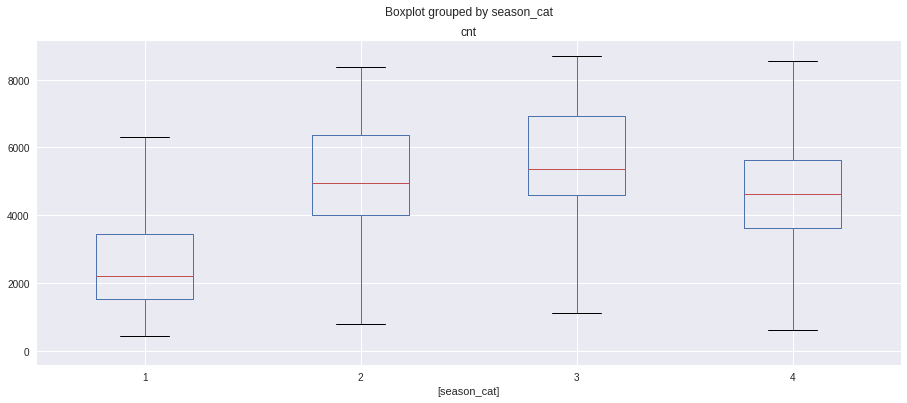

In [11]:
df[['season_cat', 'cnt']].boxplot(by = 'season_cat')



> The box plot between the number of bike rentals and season shows that the line can not capture the non linear relationship and that there's is more rentals in winter as compared to spring.




Changing season to categorical and plotting boxplot



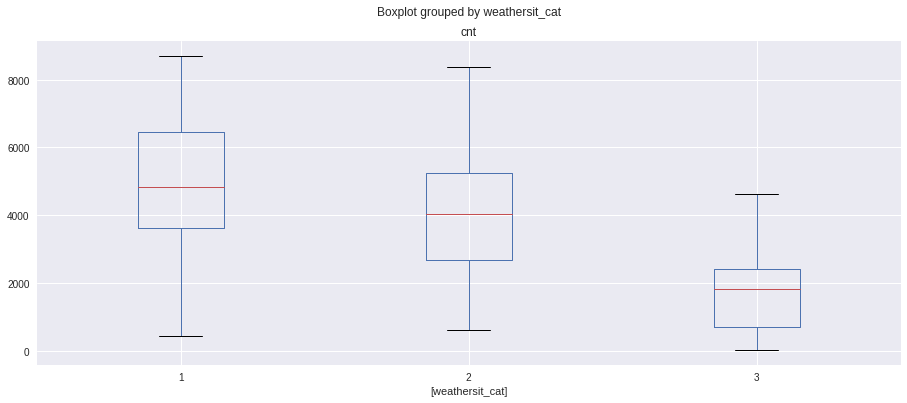

In [12]:
df['weathersit_cat'] = pd.Categorical(df['weathersit'])
df[['weathersit_cat', 'cnt']].boxplot(by = 'weathersit_cat')

> During holidays there is very less bike rental during morning hours and it eventually increases after noon.


Plottint cnt with respect to hum

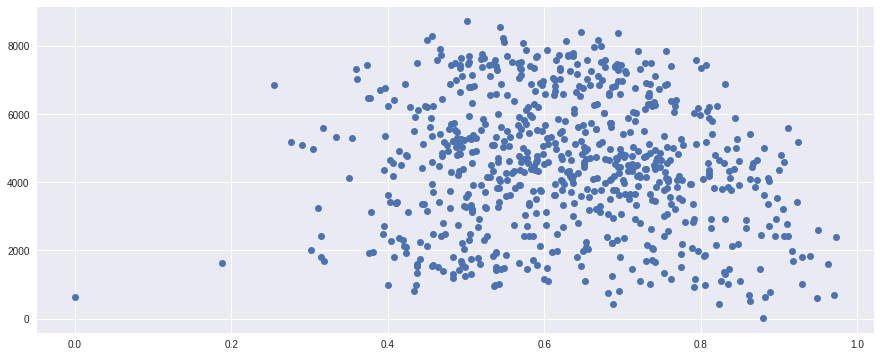

In [13]:
plt.plot(df['hum'], df['cnt'], 'o')



> It doesnt capture any meaningful relationship between humidity and target variable



Correlation between hum and cnt


In [14]:
df['hum'].corr(df['cnt'])

-0.1006585621371552

>There is also a worst correlation between humidity and cnt

In [15]:
df['windspeed'].describe()

count    731.000000
mean       0.190486
std        0.077498
min        0.022392
25%        0.134950
50%        0.180975
75%        0.233214
max        0.507463
Name: windspeed, dtype: float64

Correlation between windspeed and cnt


In [16]:
df['windspeed'].corr(df['cnt'])

-0.23454499742166993

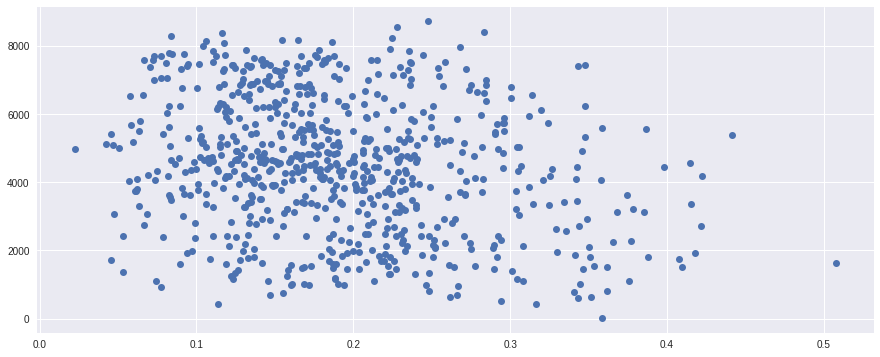

In [17]:
plt.plot(df['windspeed'], df['cnt'], 'o')

In [0]:
df['dteday'] = df['dteday'].map(datetime.toordinal)

In [0]:
dates = df['dteday']
dates = (dates-dates.min())/(dates.max()-dates.min())
df['dteday'] = dates

In [0]:
dates = df['yr']
dates = (dates-dates.min())/(dates.max()-dates.min())
df['yr'] = dates

Correlation between dteday and cnt


In [21]:
df['dteday'].corr(df['cnt'])

0.6288302722083062

Correlation between windspeed and temp


In [22]:
df['season'].corr(df['temp'])

0.3343148563990949

In [23]:
df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.500000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.289268,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,0.500000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,0.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,1.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Cost fuction

In [0]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)
    J = J / (2 * m)
    return J

Function to find RMSE

In [0]:
def RMSE(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B).astype(int) - Y) ** 2)    
    J = J**0.5
    J = J / (2 * m)
    return J

Function to find R-squared value

In [0]:
def R_sqrd(X, Y, B):
  Ybar = np.mean(Y)
  ssreg = np.sum((X.dot(B) - Ybar)**2)
  sstot = np.sum((Y - Ybar)**2)
  return ssreg/sstot

Function to do Linear Regression

In [0]:
def linear_regression(df, features, target):
  
  train_df = df[:int(len(df)*0.7)]
  test_df = df[int(len(df)*0.7):]
  m = len(train_df)
  x0 = np.ones(m)
  X = np.array([x0] + [train_df[x] for x in features]).T
  B = np.array([0] + [0 for x in features])
  Y = np.array(train_df[target])
  alpha = 0.0001
  inital_cost = cost_function(X, Y, B)
  print('Initial cost:', inital_cost)
  newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)
#   plot_ROC(Y, X.dot(newB))
  print(newB)
  print('RMSE on train:', RMSE(X, Y, newB))
  print('R squared value on train:', R_sqrd(X, Y, newB))
#   print(test_df)
  m = len(test_df)
  x0 = np.ones(m)
  X_ = np.array([x0] + [test_df[x] for x in features]).T
  Y_ = np.array(test_df[target])
  print('RMSE on test:', RMSE(X_, Y_, newB))
  print('R squared value on train:', R_sqrd(X_, Y_, newB))
  return newB

Function to do gradient descent

In [0]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

Doing linear regression with the features and finding RMSE and R-squared

In [33]:
features = ['dteday', 'holiday', 'weekday',
       'workingday', 'hum', 'windspeed']
features = ['season', 'yr', 'mnth', 'temp', 'weathersit']
linear_regression(df, features, 'cnt')
print('min count',min(df['cnt']))
print('max count',max(df['cnt']))

8453737.078277886
[1445.91356325  759.03302101 2061.06937797   -7.92474148 1655.87187535
 -478.89947287]
RMSE on train: 22.029837680382563
R squared value on train: 0.45231669359976995
495985.2535801187
RMSE on test: 47.11257892511518
R squared value on train: 0.17404490604303208
min count 22
max count 8714
